## 한글

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# Dacon_영화 관객수 예측 경진대회
https://dacon.io/competitions/official/235536/data

In [ ]:
%ls

 sample_data/  '영화 관객수.zip'


In [ ]:
!unzip '영화 관객수.zip'

Archive:  영화 관객수.zip
  inflating: submission.csv          
  inflating: movies_train.csv        
  inflating: movies_test.csv         


# 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
base_path = "."
train = pd.read_csv(f'{base_path}/movies_train.csv', index_col="title")
test = pd.read_csv(f'{base_path}/movies_test.csv', index_col="title")
submission = pd.read_csv(f'{base_path}/submission.csv', index_col="title")

train.shape, test.shape, submission.shape

((600, 11), (243, 10), (243, 1))

In [228]:
train.head(2)

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [229]:
test.head(2)

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
title,,,,,,,,,,
용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00,2,304,3
아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25,4,275,3


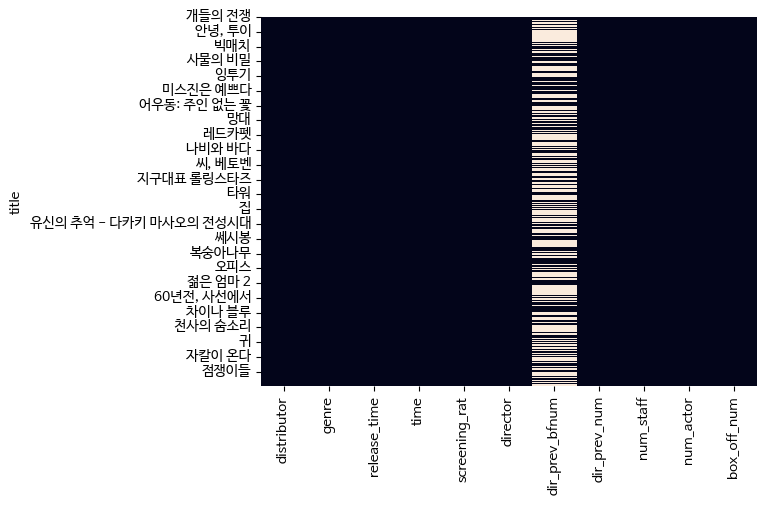

In [230]:
sns.heatmap(train.isnull(), cbar=False)
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [231]:
train = train.drop(['dir_prev_bfnum'],axis = 1)
test = test.drop(['dir_prev_bfnum'],axis = 1)

<Axes: title={'center': 'Pearson Correalation of Features'}>

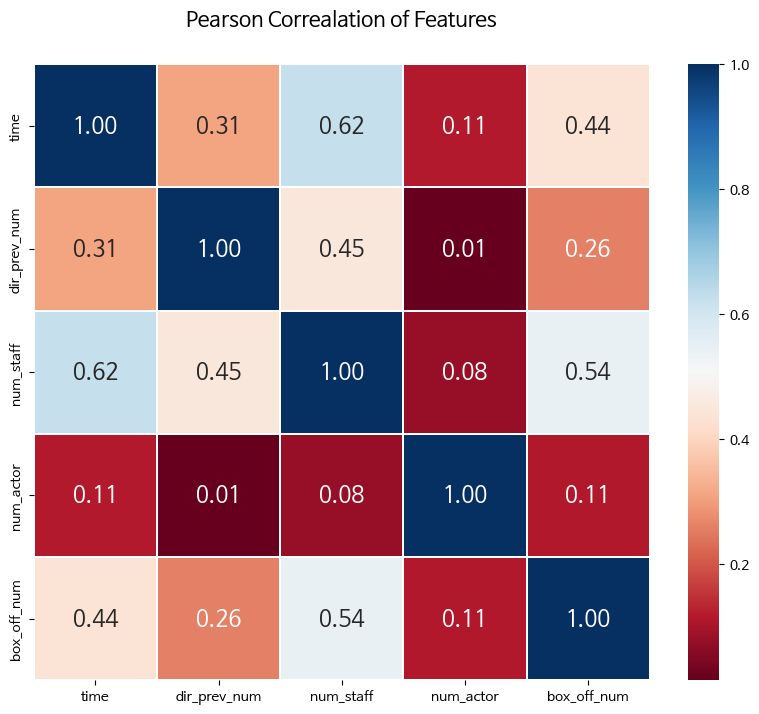

In [232]:
heatmap_data = train[['time','dir_prev_num','num_staff','num_actor','box_off_num']]

colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))

plt.title('Pearson Correalation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0
            , square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

<ipython-input-233-785b419f3c01>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, y='genre', x='box_off_num', ci=None)


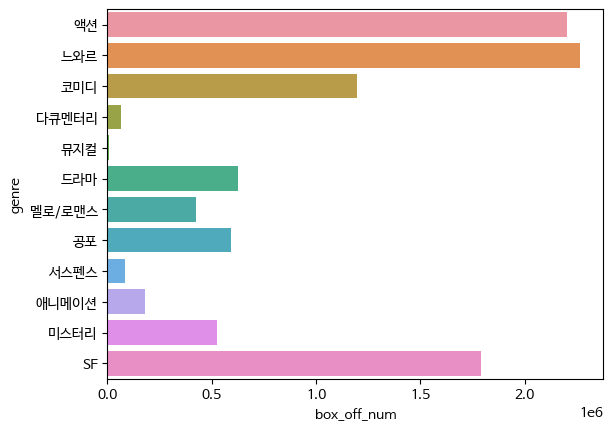

In [233]:
sns.barplot(data=train, y='genre', x='box_off_num', ci=None)
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [234]:
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

In [235]:
train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

<ipython-input-236-19456855214c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, y='distributor', x='box_off_num', ci=None)


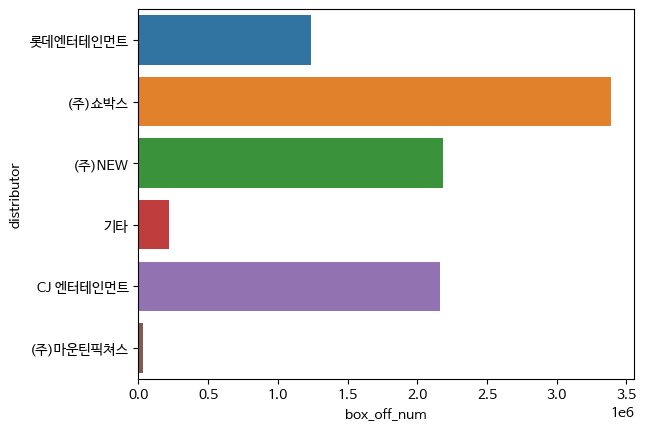

In [236]:
sns.barplot(data=train, y='distributor', x='box_off_num', ci=None)
plt.show()

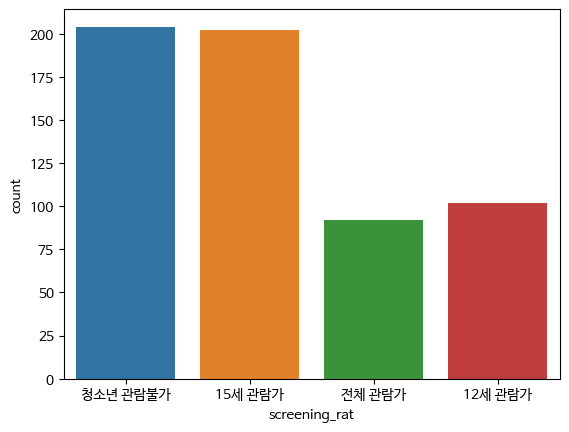

In [237]:
sns.countplot(x='screening_rat', data=train)
plt.show()

In [238]:
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [239]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [240]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   distributor    600 non-null    object        
 1   genre          600 non-null    object        
 2   release_time   600 non-null    datetime64[ns]
 3   time           600 non-null    int64         
 4   screening_rat  600 non-null    object        
 5   dir_prev_num   600 non-null    int64         
 6   num_staff      600 non-null    int64         
 7   num_actor      600 non-null    int64         
 8   box_off_num    600 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 63.0+ KB


In [241]:
train['년'] = pd.DatetimeIndex(train['release_time']).year
test['년'] = pd.DatetimeIndex(test['release_time']).year

train['월'] = pd.DatetimeIndex(train['release_time']).month
test['월'] = pd.DatetimeIndex(test['release_time']).month

train['일'] = pd.DatetimeIndex(train['release_time']).day
test['일'] = pd.DatetimeIndex(test['release_time']).day

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   distributor    600 non-null    object        
 1   genre          600 non-null    object        
 2   release_time   600 non-null    datetime64[ns]
 3   time           600 non-null    int64         
 4   screening_rat  600 non-null    object        
 5   dir_prev_num   600 non-null    int64         
 6   num_staff      600 non-null    int64         
 7   num_actor      600 non-null    int64         
 8   box_off_num    600 non-null    int64         
 9   년              600 non-null    int64         
 10  월              600 non-null    int64         
 11  일              600 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 77.1+ KB


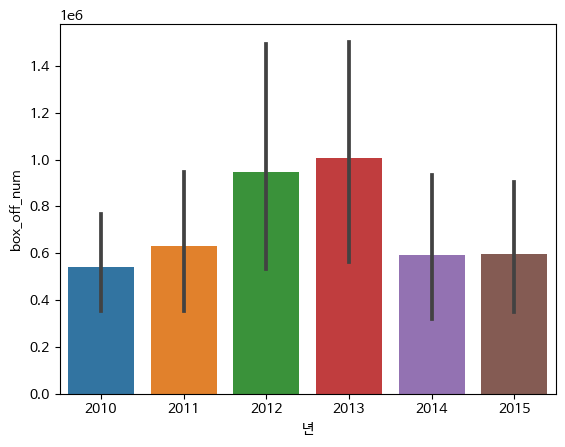

In [243]:
sns.barplot(data=train, x='년',  y='box_off_num')
plt.show()

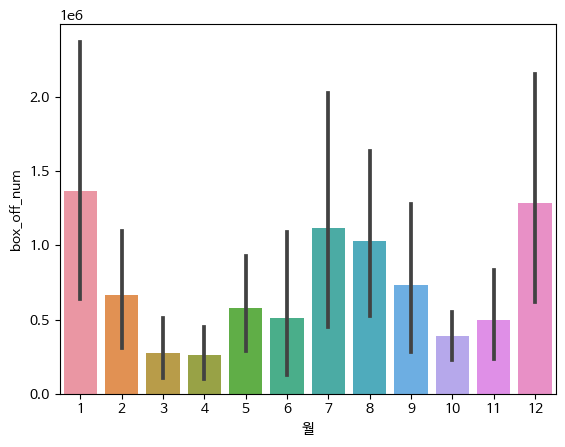

In [244]:
sns.barplot(data=train, x='월',  y='box_off_num')
plt.show()

In [245]:
categorical_feature = train.select_dtypes(exclude="number").columns
categorical_feature

Index(['distributor', 'genre', 'release_time', 'screening_rat'], dtype='object')

In [246]:
train[categorical_feature] = train[categorical_feature].astype("category")
test[categorical_feature] = test[categorical_feature].astype("category")

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distributor    600 non-null    category
 1   genre          600 non-null    category
 2   release_time   600 non-null    category
 3   time           600 non-null    int64   
 4   screening_rat  600 non-null    category
 5   dir_prev_num   600 non-null    int64   
 6   num_staff      600 non-null    int64   
 7   num_actor      600 non-null    int64   
 8   box_off_num    600 non-null    int64   
 9   년              600 non-null    int64   
 10  월              600 non-null    int64   
 11  일              600 non-null    int64   
dtypes: category(4), int64(8)
memory usage: 72.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 용서는 없다 to 조선안방 스캔들-칠거지악 2
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   

(None, None)

In [247]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distributor    600 non-null    category
 1   genre          600 non-null    category
 2   release_time   600 non-null    category
 3   time           600 non-null    int64   
 4   screening_rat  600 non-null    category
 5   dir_prev_num   600 non-null    int64   
 6   num_staff      600 non-null    int64   
 7   num_actor      600 non-null    int64   
 8   box_off_num    600 non-null    int64   
 9   년              600 non-null    int64   
 10  월              600 non-null    int64   
 11  일              600 non-null    int64   
dtypes: category(4), int64(8)
memory usage: 72.8+ KB


,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월,일
title,,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398,2012,11,22
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501,2015,11,19
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083,2013,6,5
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866,2012,7,12
불량남녀,기타,코미디,2010-11-04,108,15세 관람가,1,251,2,483387,2010,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1,510,7,1475091,2014,8,13
파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1,286,6,1716438,2013,3,14
살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,0,123,4,2475,2010,9,30


In [248]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train[categorical_feature] = oe.fit_transform(train[categorical_feature])
test[categorical_feature] = oe.transform(test[categorical_feature])

In [249]:
X = train.drop(columns="box_off_num")
y = train["box_off_num"]

X.shape, y.shape

((600, 11), (600,))

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.1, random_state=42
)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((540, 11), (60, 11), (540,), (60,))

In [251]:
X_test = test
X_test.shape

(243, 11)

In [252]:
import tensorflow as tf
model = tf.keras.Sequential([
    # tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

In [253]:
optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(loss="mse", 
              optimizer=optimizer, 
              metrics=["mse", "mae"]
              )

In [254]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                768       
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [255]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)

history = model.fit(X_train, y_train, 
                    epochs=50, validation_data=(X_valid, y_valid), 
                    batch_size=10,
                    callbacks=[early_stop], verbose=1)
history

Epoch 1/50
54/54 [==============================] - 1s 5ms/step - loss: 3727128526848.0000 - mse: 3727128526848.0000 - mae: 754910.1250 - val_loss: 2427412545536.0000 - val_mse: 2427412545536.0000 - val_mae: 843589.1250
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 3334826098688.0000 - mse: 3334826098688.0000 - mae: 970849.5000 - val_loss: 2419743784960.0000 - val_mse: 2419743784960.0000 - val_mae: 1001984.0000
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 3282922110976.0000 - mse: 3282922110976.0000 - mae: 1024975.5000 - val_loss: 2322546294784.0000 - val_mse: 2322546294784.0000 - val_mae: 880900.6875
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 3199170772992.0000 - mse: 3199170772992.0000 - mae: 974670.7500 - val_loss: 2273800880128.0000 - val_mse: 2273800880128.0000 - val_mae: 865002.3125
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 3023189311488.0000 - mse: 3023189311488.0000 -

In [256]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
45,2.242769e+12,2.242769e+12,636267.8750,2.168688e+12,2.168688e+12,734314.0625
46,2.257579e+12,2.257579e+12,652770.7500,2.151113e+12,2.151113e+12,698049.1250
47,2.256652e+12,2.256652e+12,652187.9375,2.196749e+12,2.196749e+12,749121.0625
48,2.283366e+12,2.283366e+12,630223.6250,2.201089e+12,2.201089e+12,759227.3125
49,2.265979e+12,2.265979e+12,649292.8750,2.152770e+12,2.152770e+12,693726.1250


<Axes: >

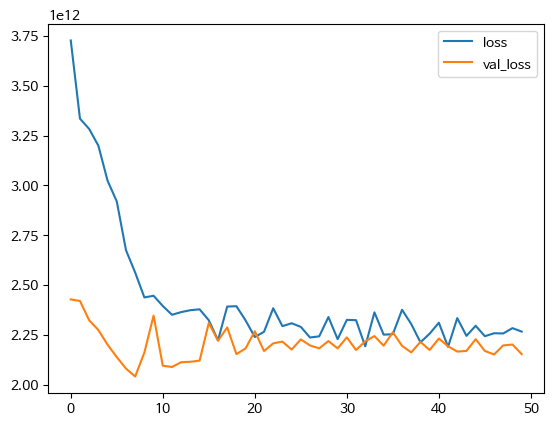

In [257]:
# loss, accuracy 값 시각화 
df_hist[["loss", "val_loss"]].plot()

In [258]:
model.evaluate(X_valid, y_valid)

2/2 [==============================] - 0s 6ms/step - loss: 2152770174976.0000 - mse: 2152770174976.0000 - mae: 693726.1250


[2152770174976.0, 2152770174976.0, 693726.125]

In [259]:
y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

2/2 [==============================] - 0s 5ms/step


array([1987630.8 ,  140953.78,   93453.03,  159774.44,  639677.9 ],
      dtype=float32)

In [260]:
y_predict = model.predict(X_test).flatten()
y_predict[:5]

8/8 [==============================] - 0s 1ms/step


array([1215729.5, 1034094.5, 2277661. , 2176997.2, 1826966.5],
      dtype=float32)

In [261]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, y_valid_pred)
r2

0.11879029565648092

In [262]:
submission["box_off_num"] = y_predict

In [263]:
file_name = f"submit_tf_{r2:.5f}.csv"
file_name

'submit_tf_0.11879.csv'

In [264]:
submission.to_csv(file_name)
pd.read_csv(file_name).head(2)

,title,box_off_num
0,용서는 없다,1215729.5
1,아빠가 여자를 좋아해,1034094.5


In [265]:
from google.colab import files

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>